This assignment will read in a CSV file and plot various variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading data

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
df.head(5)

C:\Users\Marcella\AppData\Local\Temp\ipykernel_17660\3159912779.py:7: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [2]:
print(df.dtypes)

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object


In [3]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
print(df.dtypes)

date     datetime64[ns]
ind               int64
rain             object
ind.1             int64
temp            float64
ind.2             int64
wetb            float64
dewpt           float64
vappr           float64
rhum              int64
msl              object
ind.3             int64
wdsp             object
ind.4             int64
wddir            object
ww               object
w                object
sun             float64
vis              object
clht             object
clamt            object
dtype: object


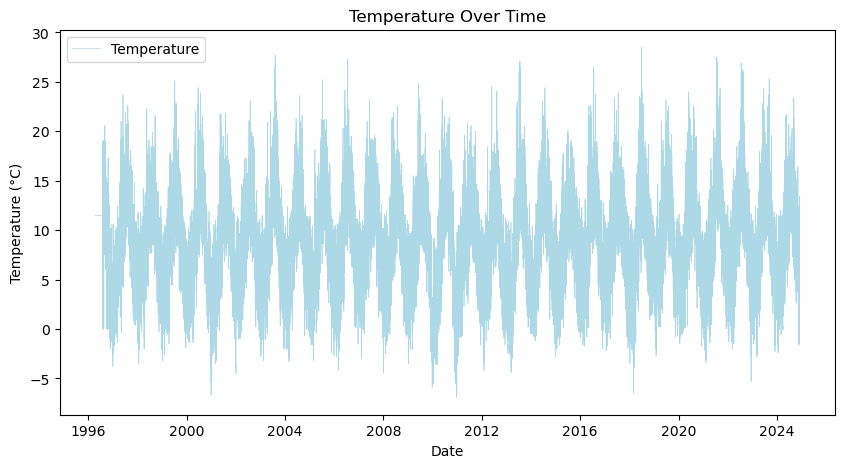

In [4]:
# Plot the temperature
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['temp'], label='Temperature', color='lightblue', linewidth=0.5)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [5]:
df['day'] = df['date'].dt.date # dropping the time to make new column with just the day

daily_mean_temp = df.groupby('day')['temp'].mean() # groups the data by day and calculates the mean temperature.
print (daily_mean_temp)

day
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
                ...    
2024-11-27     2.279167
2024-11-28     4.545833
2024-11-29    11.229167
2024-11-30    11.525000
2024-12-01     0.000000
Name: temp, Length: 10352, dtype: float64


When I calculate the mean with groupby, it creates a new dataframe or series where the grouped values (like days or months) are the index, and the mean is the values. To plot this, I use .index for the x-axis (the grouped labels) and .values for the y-axis (the calculated numbers). This tells pandas exactly what to use for the plot.

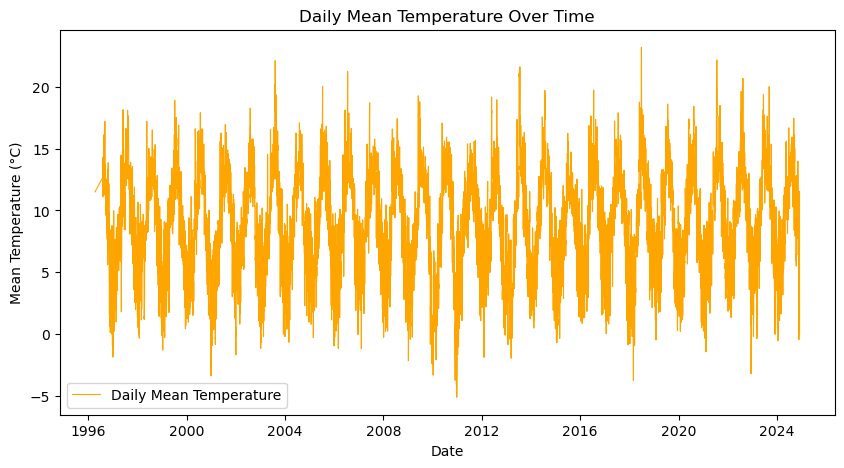

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(daily_mean_temp.index, daily_mean_temp.values, label='Daily Mean Temperature', color='orange', linewidth=0.8)
# extracting the date and mean from the grouped data in 'daily_mean_temp' here using .index and .values
plt.title('Daily Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

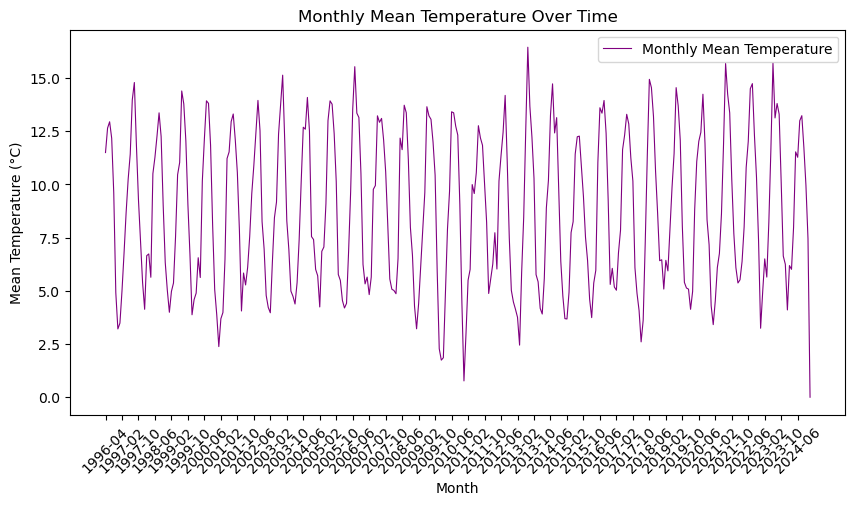

In [7]:
# Extracting the month and year for grouping
df['month'] = df['date'].dt.to_period('M')

# Group by month and calculate the mean temperature
monthly_mean_temp = df.groupby('month')['temp'].mean()

# Plot the mean temperature for each month
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean_temp.index.astype(str), monthly_mean_temp.values, label='Monthly Mean Temperature', color='purple', linewidth=0.8)
plt.title('Monthly Mean Temperature Over Time')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(monthly_mean_temp.index.astype(str)[::8], rotation=45)  # Show every 6th tick and rotate x-axis labels for better readability
plt.legend()
plt.show()

## Cleaning the Windspeed column

In [8]:
print(df['wdsp'][:1000])
pd.set_option("display.max_rows", None)

0       0
1       0
2       0
3       0
4       0
       ..
995    10
996     9
997     7
998     6
999     7
Name: wdsp, Length: 1000, dtype: object


I Went the long way first replacing empty entries with a mean value and then converting the wdpd columnn to int, but realised that I could use pd.to_numeric to get basically the same result much easier. It doesn't fill in the gaps with the mean but in a dataset so large with so few NaNs I decided it didn't matter. It did give me floats rather than ints too, but again this didn't affect my calculations.

When I used the replace() function, before I replaced NaNs with a mean, I had 130 NaNs. The pd.to_numeric function returned 50 NaNs. So it does not catch as many of the blanks. This is important but again because there are so many entries and so few NaNs and I was able to do calculations, I went with pd.to_numeric. I don't know if this was the right approach!

I was going to replace the zeros in the windspeed column but decided to keep them because it's possible they represent calm weather conditions when there was no wind, which is valid data. Zeros are different from missing values (NaN) because they still carry information about the weather, so removing or replacing them might distort the analysis.

In [9]:
# Lomg way around:
# df['wdsp'] = df['wdsp'].replace(["", " "], np.nan)

# Fill NaN values with the mean
# mean_wsp = df['wdsp'][df['wdsp'].notnull()].mean()
# df['wdsp'].fillna(mean_wsp)

# Convert to integer
# df['wdsp'] = df['wdsp'].astype(int)

# Check the data type
# print(df['wdsp'].dtype)

# Convert 'wsp' to numeric and turn invalid entries into NaN

df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

print(df['wdsp'][:1000])


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      6.0
19      8.0
20      9.0
21      8.0
22      8.0
23      8.0
24      7.0
25     11.0
26     11.0
27     13.0
28     13.0
29     12.0
30     14.0
31     13.0
32     13.0
33     13.0
34     13.0
35     12.0
36     11.0
37     10.0
38      9.0
39      NaN
40      7.0
41      4.0
42      6.0
43      5.0
44      5.0
45      6.0
46      6.0
47      5.0
48      8.0
49      9.0
50     10.0
51     11.0
52     13.0
53     10.0
54      8.0
55      8.0
56      9.0
57      9.0
58      9.0
59      8.0
60      7.0
61      8.0
62      8.0
63      6.0
64      5.0
65      5.0
66      4.0
67      5.0
68      5.0
69      6.0
70      6.0
71      4.0
72      6.0
73      7.0
74      8.0
75      9.0
76     10.0
77      9.0
78     10.0
79      9.0
80      9.0
81     10.0
82     10.0
83  

In [10]:
print(df['wdsp'].isnull().sum())

50


## Plotting Windspeed over time

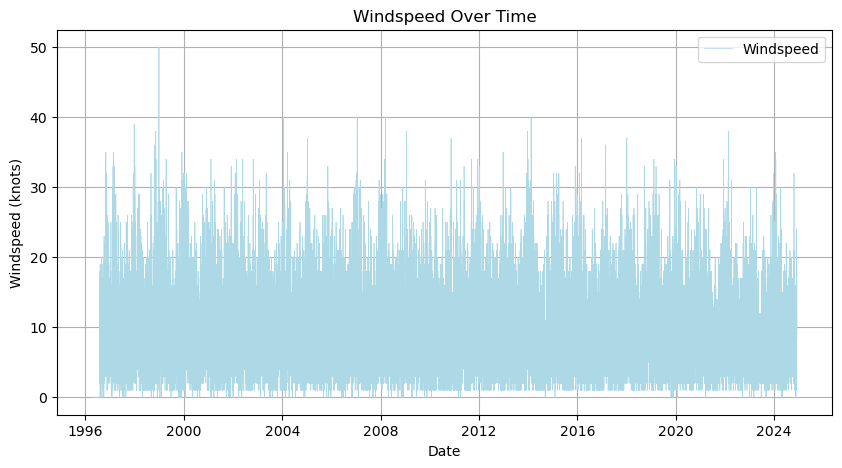

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['wdsp'], label='Windspeed', color='lightblue', linewidth=0.5)
plt.title('Windspeed Over Time')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.grid(True)
plt.show()

## Plotting the rolling average

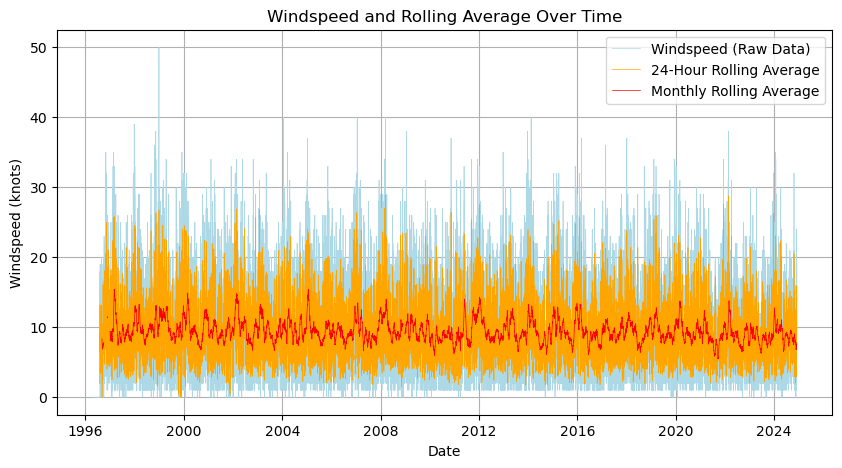

In [12]:
# Calculate the rolling average (e.g., 24-hour window)
rolling_windspeed_day = df['wdsp'].rolling(window=24).mean()
rolling_windspeed_month = df['wdsp'].rolling(window=720).mean()

# Plot the raw windspeed
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['wdsp'], label='Windspeed (Raw Data)', color='lightblue', linewidth=0.5)

# Plot the rolling average
plt.plot(df['date'], rolling_windspeed_day, label='24-Hour Rolling Average', color='orange', linewidth=0.5)
plt.plot(df['date'], rolling_windspeed_month, label='Monthly Rolling Average', color='red', linewidth=0.5)

# Add labels and legend
plt.title('Windspeed and Rolling Average Over Time')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.legend()
plt.grid(True)
plt.show()

## Plotting the Daily Max Windspeed

In [24]:
# Extract day from datetime
df['day'] = df['date'].dt.date

# Group by day and calculate the max windspeed
daily_max_windspeed = df.groupby('day')['wdsp'].max()

# Checking
print(daily_max_windspeed.head())
print()
print(daily_max_windspeed.index.dtype)  # Check the index dtype
print(daily_max_windspeed.values.dtype)  # Check the values dtype



day
1996-04-10     0.0
1996-07-31     0.0
1996-08-01    14.0
1996-08-02    13.0
1996-08-03    10.0
Name: wdsp, dtype: float64

object
float64


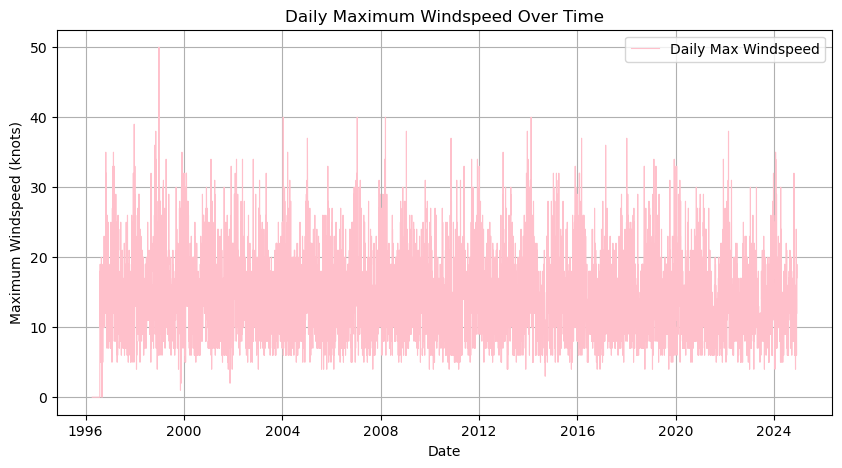

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(daily_max_windspeed.index, daily_max_windspeed.values, label='Daily Max Windspeed', color='pink', linewidth=0.8)
plt.title('Daily Maximum Windspeed Over Time')
plt.xlabel('Date')
plt.ylabel('Maximum Windspeed (knots)')
plt.legend()
plt.grid(True)
plt.show()

## Plotting Monthly Mean of Daily Max 

When I used df['date'].dt.date to get the daily windspeed Max, it turned the dates into Python’s datetime.date objects, so the index ended up with an object dtype after grouping. This wasn’t ideal for plotting or working with dates, so I converted it back to datetime64[ns] using pd.to_datetime() to make things easier to work with.

In [ ]:
# Converting the day-based index to datetime to group by month
daily_max_windspeed.index = pd.to_datetime(daily_max_windspeed.index)

# Group by month and calculate the mean of daily max windspeeds
monthly_mean_windspeed = daily_max_windspeed.groupby(daily_max_windspeed.index.to_period('M')).mean()

# Checking
print(monthly_mean_windspeed.head())



day
1996-04     0.000000
1996-07     0.000000
1996-08    12.516129
1996-09    12.266667
1996-10    18.193548
Freq: M, Name: wdsp, dtype: float64
float64


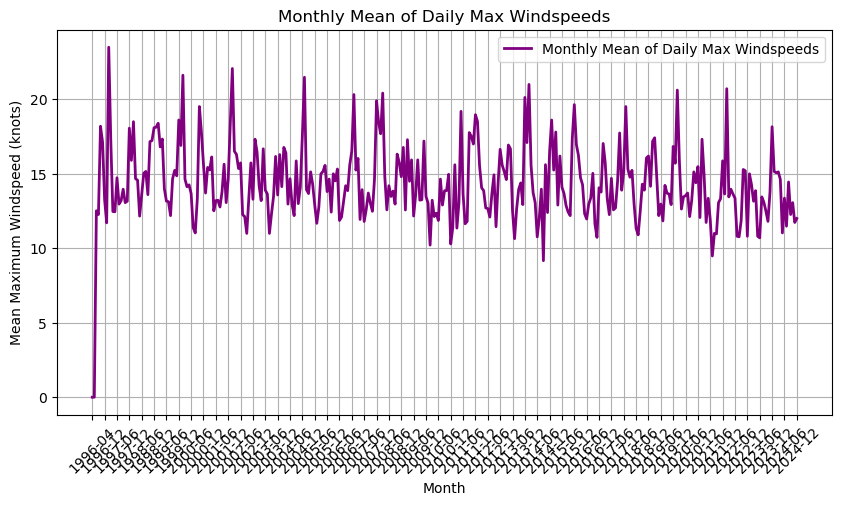

In [16]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean_windspeed.index.astype(str), monthly_mean_windspeed.values, label='Monthly Mean of Daily Max Windspeeds', color='purple', linewidth=2)
plt.title('Monthly Mean of Daily Max Windspeeds')
plt.xlabel('Month')
plt.ylabel('Mean Maximum Windspeed (knots)')
plt.xticks(monthly_mean_windspeed.index.astype(str)[::6], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## End